In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

## 1. Solución cerrada de regresión lineal


### a. Utilizando numpy (np.random), genere 100 datos que se encuentren entre 0 y 3 utilizando una semilla aleatoria. Este array representará su variable independiente.

In [ ]:
np.random.seed(2199)
x = np.random.uniform(0, 3, 100)
x = x.reshape(-1, 1)
print(x.shape)

(100, 1)


In [ ]:
x

array([[3.45305908e-01],
       [3.71761342e-01],
       [1.66170343e+00],
       [9.88266735e-01],
       [1.03169541e+00],
       [1.20853315e+00],
       [6.18668021e-01],
       [2.54108713e-01],
       [2.65242895e+00],
       [1.98594519e+00],
       [1.27797144e+00],
       [2.67122109e+00],
       [5.96989338e-01],
       [2.22330856e+00],
       [4.34209203e-01],
       [1.42763299e+00],
       [2.20110603e+00],
       [2.54311668e-03],
       [1.93559425e+00],
       [7.18806774e-01],
       [2.35814530e+00],
       [9.01222485e-01],
       [2.08499806e+00],
       [2.76511716e+00],
       [2.97950638e-01],
       [1.89265399e+00],
       [2.84667092e+00],
       [1.25293961e+00],
       [4.18023889e-01],
       [1.41882412e+00],
       [4.62587996e-02],
       [2.61532131e+00],
       [1.18407513e+00],
       [1.59142681e+00],
       [6.56529200e-01],
       [2.62647152e+00],
       [2.86467747e+00],
       [2.44189664e+00],
       [7.49807177e-01],
       [1.75229825e+00],


### b. Con la misma librería, genere los 100 datos de la variable dependiente de la siguiente forma y = 5 +2x + u(-2,5)

In [ ]:
#the u(-2, 5) represents a random error term that follows a uniform distribution between -2 and 5.
u = np.random.uniform(-2, 5, 100)
u = u.reshape(-1, 1)
print(u.shape)

(100, 1)


In [ ]:
# now we generate y
y = 5 + 2*x + u

In [ ]:
y

array([[ 7.36293651],
       [10.12940291],
       [10.67501019],
       [10.56900887],
       [10.54301957],
       [ 7.79949636],
       [ 9.5675221 ],
       [ 9.06749639],
       [ 9.66220368],
       [13.89518383],
       [ 7.65280551],
       [13.29723659],
       [ 9.1249359 ],
       [11.57173202],
       [ 4.18811444],
       [10.91571821],
       [14.39412399],
       [ 9.57614376],
       [12.51130973],
       [ 4.8496582 ],
       [ 9.63411692],
       [ 7.49877624],
       [12.9575977 ],
       [11.16230404],
       [ 6.8123205 ],
       [12.02598462],
       [12.77793341],
       [ 6.16623869],
       [10.40706108],
       [10.57560281],
       [ 7.71159517],
       [10.65650761],
       [10.29080132],
       [13.09217645],
       [10.20881532],
       [ 8.82705587],
       [13.8900859 ],
       [13.95784475],
       [ 6.00694129],
       [ 9.49838405],
       [ 6.71115207],
       [ 9.22288722],
       [13.90608835],
       [ 8.82596382],
       [ 9.24562981],
       [ 6

### c. Por medio de matplotlib (o seaborn), genere un gráfico de dispersión (scatter plot) entre la variable dependiente y la variable independiente

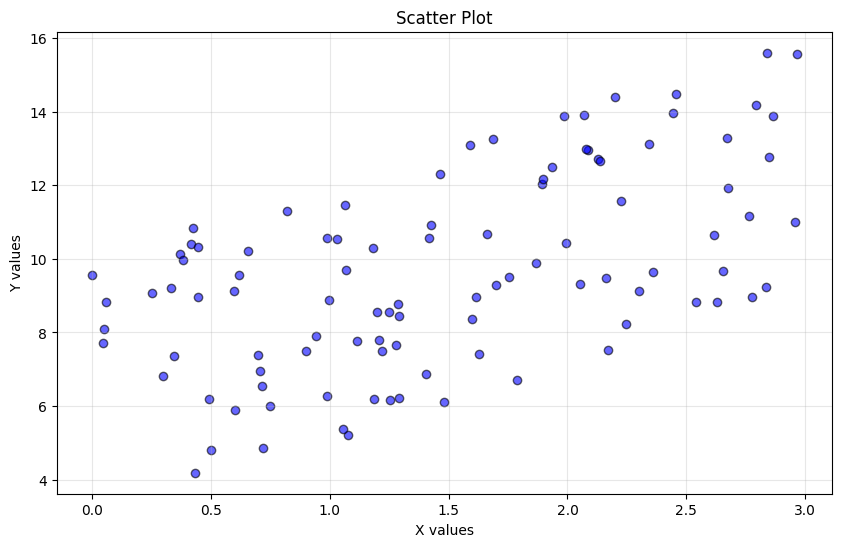

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, c='blue', edgecolors='black')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot')
plt.grid(True, alpha=0.3)
plt.show()

### d. Estudie y aplique los métodos disponibles en numpy.linalg para ajustar una regresión lineal a través de su solución cerrada. ¿Cuál es el error cuadrático medio de la solución?

 In matrix form:
```
┌         ┐   ┌           ┐   ┌    ┐
│ 1    1  │   │ intercept │   │  7 │
│ 1    2  │ · │   slope   │ = │  9 │
│ 1    3  │   └           ┘   │ 11 │
└         ┘                   └    ┘
    A       ·  coefficients  =   y
```

In [ ]:
x_flat = x.flatten()  # Shape: (100,)
y_flat = y.flatten()  # Shape: (100,)

# Create matrix A
A = np.column_stack([np.ones(len(x_flat)), x_flat])

# Use lstsq
coefficients, residuals, rank, s = np.linalg.lstsq(A, y_flat, rcond=None)

# results
intercept = coefficients[0]
slope = coefficients[1]

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"Equation: y = {intercept} + {slope}*x")

Intercept: 6.999943835225311
Slope: 1.7897553346898376
Equation: y = 6.999943835225311 + 1.7897553346898376*x


Calcular MSE

In [ ]:
#With result we predict using x
y_pred = intercept + slope * x_flat

In [ ]:
mse = np.around(mean_squared_error(y, y_pred), decimals = 6)
#mse = np.mean((y_flat - y_pred)**2)
print(f"MSE: {mse}")

MSE: 4.657989


El MSE es 4.657989

### e. Utilizando matplotlib (o seaborn), genere un gráfico que incluya la solución (recta ó ptima) y los datos utilizados

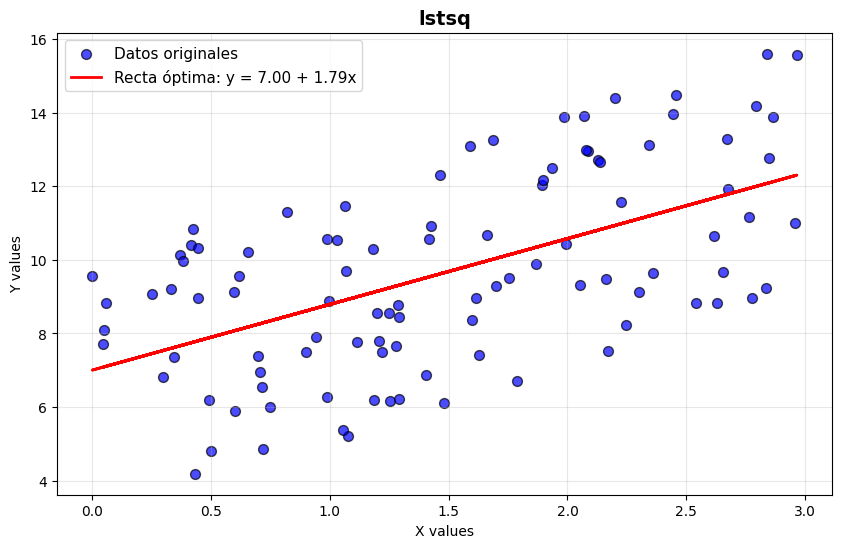

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_flat, y_flat, alpha=0.7, color='blue',
            edgecolors='black', s=50, label='Datos originales')

# Graficar la recta óptima
plt.plot(x_flat, y_pred, color='red', linewidth=2,
         label=f'Recta óptima: y = {intercept:.2f} + {slope:.2f}x')

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('lstsq', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

## 2. Regresión Polinomial

### a. De ahora en adelante, usted trabajará con una base de datos real, esta corresponde a una curva de luz (intensidad de luz de una estrella en funció n del tiempo). En primer lugar, lea el archivo ts.csv utilizando pandas. Trabaje con una muestra de 200 datos

In [ ]:
dataset_two = pd.read_csv('/content/ts.csv').sample(200)
dataset_two

,tiempo,magnitud
1128,1.760128,-0.161479
522,-0.372054,0.020742
595,-0.291430,-0.316562
706,-0.092583,-0.386349
929,0.693024,0.613932
...,...,...
301,-0.853289,0.005234
31,-1.379782,-0.828333
551,-0.339478,0.082775
377,-0.696375,-0.262283


### b. Mediante matplotlib o seaborn, visualice la curva de luz con un scatter plot

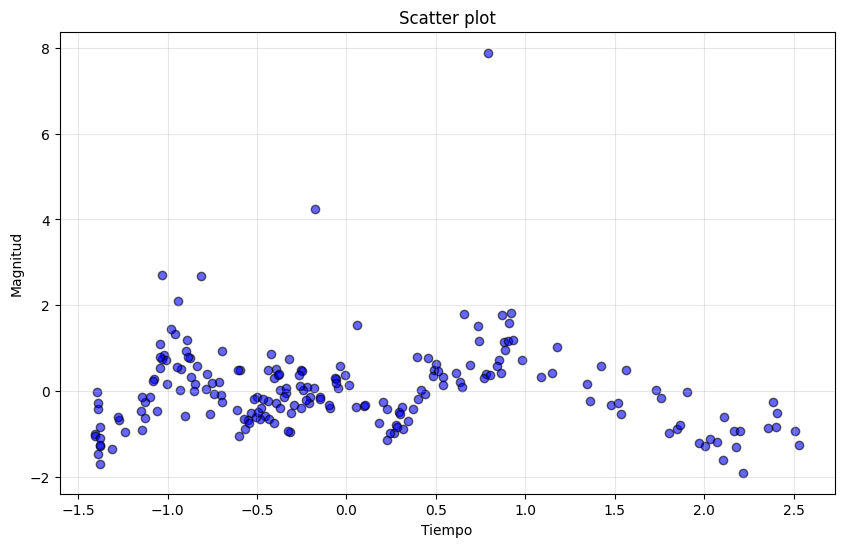

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_two['tiempo'],dataset_two['magnitud'], alpha=0.6, c='blue', edgecolors='black')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud')
plt.title('Scatter plot')
plt.grid(True, alpha=0.3)
plt.show()

ya que el movimiento es curvo , se necesitara una ecuacion polinomial para poder predecir el movimiento

### c. Genere una transformación polinomial de la variable independiente. Para esta transformación puede crear su propia función o puede utilizar el método disponible por Scikit-Learn.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
x = dataset_two['tiempo']
y = dataset_two['magnitud']

poly = PolynomialFeatures(degree=1)
x_poly_1 = poly.fit_transform(x.values.reshape(-1, 1))

In [ ]:
x_poly_1

array([[ 1.        ,  1.76012769],
       [ 1.        , -0.37205351],
       [ 1.        , -0.29143019],
       [ 1.        , -0.09258326],
       [ 1.        ,  0.69302408],
       [ 1.        , -0.49851021],
       [ 1.        ,  2.03317436],
       [ 1.        ,  0.78087105],
       [ 1.        , -1.31296162],
       [ 1.        , -0.59418913],
       [ 1.        , -0.39625949],
       [ 1.        ,  0.85333943],
       [ 1.        ,  0.29606315],
       [ 1.        , -0.53189311],
       [ 1.        ,  0.40076668],
       [ 1.        , -1.27106089],
       [ 1.        , -0.18245141],
       [ 1.        , -1.0732011 ],
       [ 1.        ,  0.26725441],
       [ 1.        ,  1.73334895],
       [ 1.        , -0.54953852],
       [ 1.        ,  0.22940449],
       [ 1.        ,  1.34380955],
       [ 1.        ,  0.39348616],
       [ 1.        , -0.05597755],
       [ 1.        ,  0.22498676],
       [ 1.        , -0.45353   ],
       [ 1.        , -0.37352571],
       [ 1.        ,

Ahora tenemos los valores para x cuando se eleve a las potencias necesarias. Ejemplo:
```
x_poly = [
  [1,  1,  1],   # x=1: [1^0, 1^1, 1^2] = [1, 1, 1]
  [1,  2,  4],   # x=2: [2^0, 2^1, 2^2] = [1, 2, 4]
  [1,  3,  9],   # x=3: [3^0, 3^1, 3^2] = [1, 3, 9]
  [1,  4, 16],   # x=4: [4^0, 4^1, 4^2] = [1, 4, 16]
  [1,  5, 25]    # x=5: [5^0, 5^1, 5^2] = [1, 5, 25]
]```

### d. Ajuste regresiones polinomiales de diferentes grados.

In [ ]:
poly = PolynomialFeatures(degree=2)
x_poly_2 = poly.fit_transform(x.values.reshape(-1, 1))

poly = PolynomialFeatures(degree=3)
x_poly_3 = poly.fit_transform(x.values.reshape(-1, 1))

poly = PolynomialFeatures(degree=4)
x_poly_4 = poly.fit_transform(x.values.reshape(-1, 1))

poly = PolynomialFeatures(degree=8)
x_poly_8 = poly.fit_transform(x.values.reshape(-1, 1))

In [ ]:
modelo_linearRegression = LinearRegression()
modelo_linearRegression.fit(x_poly_1, y)

# Predecir
y_pred_1 = modelo_linearRegression.predict(x_poly_1)

In [ ]:
modelo_linearRegression = LinearRegression()
modelo_linearRegression.fit(x_poly_2, y)

# Predecir
y_pred_2 = modelo_linearRegression.predict(x_poly_2)

In [ ]:
modelo_linearRegression = LinearRegression()
modelo_linearRegression.fit(x_poly_3, y)

# Predecir
y_pred_3 = modelo_linearRegression.predict(x_poly_3)

In [ ]:
modelo_linearRegression = LinearRegression()
modelo_linearRegression.fit(x_poly_4, y)

# Predecir
y_pred_4 = modelo_linearRegression.predict(x_poly_4)

In [ ]:
modelo_linearRegression = LinearRegression()
modelo_linearRegression.fit(x_poly_8, y)

# Predecir
y_pred_8 = modelo_linearRegression.predict(x_poly_8)

### e. Grafique los modelos resultantes, ¿qué observa a medida que aumenta el grado del polinomio?

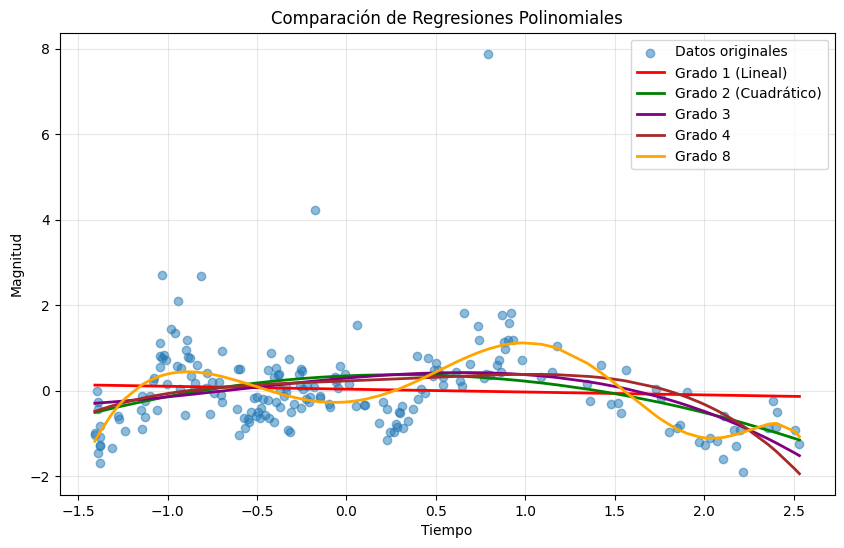

In [ ]:
# Datos originales
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Datos originales')

# Ordenar para que las líneas se vean bien
orden = np.argsort(x)

# Grado 1
plt.plot(x.iloc[orden], y_pred_1[orden], label='Grado 1 (Lineal)', linewidth=2, color='red')

# Grado 2
plt.plot(x.iloc[orden], y_pred_2[orden], label='Grado 2 (Cuadrático)', linewidth=2, color='green')

# Grado 3
plt.plot(x.iloc[orden], y_pred_3[orden], label='Grado 3 ', linewidth=2, color='purple')

# Grado 4
plt.plot(x.iloc[orden], y_pred_4[orden], label='Grado 4', linewidth=2, color='brown')

# Grado 8
plt.plot(x.iloc[orden], y_pred_8[orden], label='Grado 8', linewidth=2, color='orange')

plt.xlabel('Tiempo')
plt.ylabel('Magnitud')
plt.title('Comparación de Regresiones Polinomiales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Mientras aumenta el grado más se puede curvar la función y mientras más se curva la funcion más se acopla al movimiento de la luz. Aunque no habría que curvarla tanto porque se puede producir overfitting.

## 3. Regresión con Penalización

### a. Utilizando la misma curva de luz ts.csv y un polinomio (de grado mayor a 5), experimente con diferentes valores para el parámetro que regula la penalización en la regresión Ridge y la regresión Lasso.

Primero Lasso

Note: Usaremos el polinomio de grado 8 que creamos anteriormente

In [ ]:
alphas = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100]

In [ ]:
modelo_lasso_0 = Lasso(alpha = alphas[0]) #alpha es el valor de penalizacion
modelo_lasso_0.fit(x_poly_8, y)
y_pred_lasso_0 = modelo_lasso_0.predict(x_poly_8)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.099e+01, tolerance: 2.051e-02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
modelo_lasso_2 = Lasso(alpha = alphas[2]) #alpha es el valor de penalizacion
modelo_lasso_2.fit(x_poly_8, y)
y_pred_lasso_2 = modelo_lasso_2.predict(x_poly_8)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.819e+01, tolerance: 2.051e-02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
modelo_lasso_4 = Lasso(alpha = alphas[4]) #alpha es el valor de penalizacion
modelo_lasso_4.fit(x_poly_8, y)
y_pred_lasso_4 = modelo_lasso_4.predict(x_poly_8)

In [ ]:
modelo_lasso_5 = Lasso(alpha = alphas[5]) #alpha es el valor de penalizacion
modelo_lasso_5.fit(x_poly_8, y)
y_pred_lasso_5 = modelo_lasso_5.predict(x_poly_8)

In [ ]:
modelo_lasso_6 = Lasso(alpha = alphas[6]) #alpha es el valor de penalizacion
modelo_lasso_6.fit(x_poly_8, y)
y_pred_lasso_6 = modelo_lasso_6.predict(x_poly_8)

Ahora Ridge, lo haremos en bucle para no repetir codigo

In [ ]:
y_pred_ridge_list = []
model_ridge_list = []
for alpha in alphas:
  model = Ridge(alpha=alpha)
  model.fit(x_poly_8, y)
  y_pred_ridge = model.predict(x_poly_8)
  y_pred_ridge_list.append(y_pred_ridge)
  model_ridge_list.append(model)

### b. Obtenga los valores de los parámetros (intercepto y coeficientes) de las regresiones. ¿Qué puede comentar al respecto? ¿Qué ocurre al aumentar el valor de alfa (penalizació n) en cada modelo?

In [ ]:
#Model Lasso
print(f"modelo_lasso_0. Coef: {np.around(modelo_lasso_0.coef_,4)} - Inter: {modelo_lasso_0.intercept_:.3f}")
print(f"modelo_lasso_2. Coef: {np.around(modelo_lasso_2.coef_,4)} - Inter: {modelo_lasso_2.intercept_:.3f}")
print(f"modelo_lasso_4. Coef: {np.around(modelo_lasso_4.coef_,4)} - Inter: {modelo_lasso_4.intercept_:.3f}")
print(f"modelo_lasso_5. Coef: {np.around(modelo_lasso_5.coef_,4)} - Inter: {modelo_lasso_5.intercept_:.3f}")
print(f"modelo_lasso_6. Coef: {np.around(modelo_lasso_6.coef_,4)} - Inter: {modelo_lasso_6.intercept_:.3f}")

modelo_lasso_0. Coef: [ 0.      0.6461  1.5368 -0.7795 -0.7222  0.3329 -0.0525  0.0277 -0.0053] y Inter: -0.106
modelo_lasso_2. Coef: [ 0.      0.3175  1.2846 -0.2607 -0.671   0.1519 -0.0148  0.0249 -0.0036] y Inter: -0.048
modelo_lasso_4. Coef: [ 0.      0.     -0.      0.     -0.     -0.     -0.0084  0.      0.0003] y Inter: 0.120
modelo_lasso_5. Coef: [ 0.      0.     -0.     -0.     -0.     -0.     -0.     -0.     -0.0009] y Inter: 0.090
modelo_lasso_6. Coef: [ 0. -0. -0. -0. -0. -0. -0. -0. -0.] y Inter: 0.032


In [ ]:
for model in model_ridge_list:
  print(f"Coef: {np.around(model.coef_,4)} - Inter: {model.intercept_:.3f}")

Coef: [ 0.      0.3298  2.5513  0.094  -1.8473 -0.1383  0.36    0.0794 -0.0456] - Inter: -0.265
Coef: [ 0.      0.3296  2.5481  0.0954 -1.8437 -0.1404  0.3592  0.0802 -0.0457] - Inter: -0.264
Coef: [ 0.      0.3282  2.5201  0.1075 -1.812  -0.1589  0.3519  0.0868 -0.0469] - Inter: -0.260
Coef: [ 0.      0.3243  2.2872  0.1839 -1.5492 -0.2926  0.2897  0.1375 -0.0552] - Inter: -0.228
Coef: [ 0.      0.3999  1.41    0.1391 -0.5949 -0.5062  0.0303  0.2517 -0.0663] - Inter: -0.096
Coef: [ 0.      0.3267  0.5684 -0.0385  0.0395 -0.2944 -0.1553  0.1928 -0.0374] - Inter: 0.078
Coef: [ 0.      0.0856  0.1197  0.0149  0.0188 -0.0338 -0.1116  0.057  -0.0047] - Inter: 0.228


Al aumentar la penalización los valores de los coeficientes se reducen. En la regresión Lasso pueden llegar a reducirse hasta 0 (lo cual elimina esa parte de la ecuación) y en la regresión Ridge solo disminuyen los valores pero no llegan a 0.

### c. Grafique los modelos resultantes

Lasso

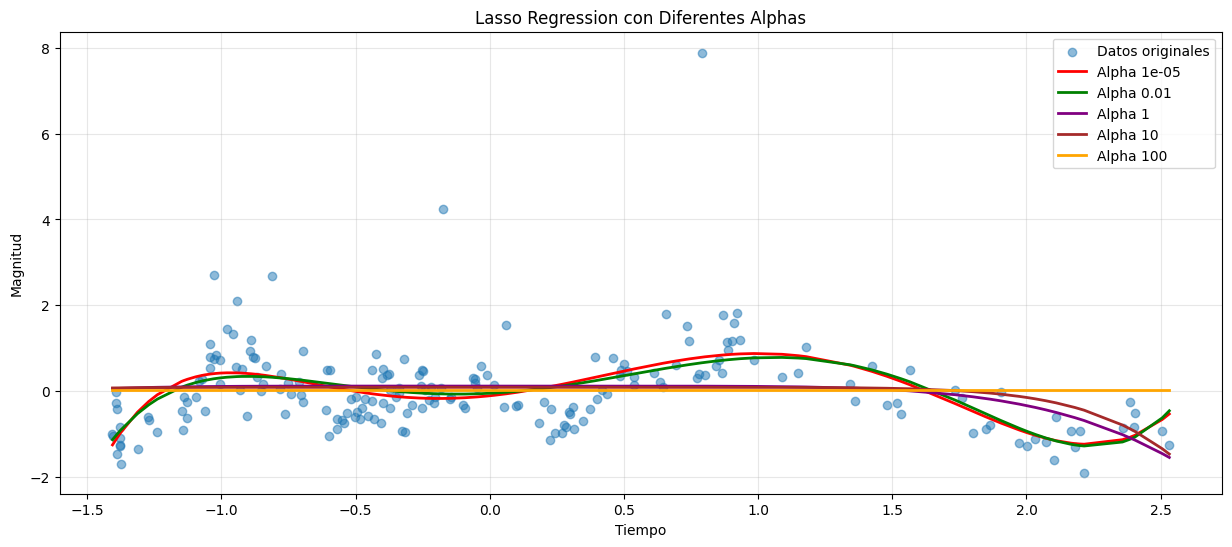

In [ ]:
# Datos originales
plt.figure(figsize=(15, 6))
plt.scatter(x, y, alpha=0.5, label='Datos originales')

# Ordenar para que las líneas se vean bien
orden = np.argsort(x)


plt.plot(x.iloc[orden], y_pred_lasso_0[orden], label=f'Alpha {alphas[0]}', linewidth=2, color='red')

plt.plot(x.iloc[orden], y_pred_lasso_2[orden], label=f'Alpha {alphas[2]}', linewidth=2, color='green')

plt.plot(x.iloc[orden], y_pred_lasso_4[orden], label=f'Alpha {alphas[4]}', linewidth=2, color='purple')

plt.plot(x.iloc[orden], y_pred_lasso_5[orden], label=f'Alpha {alphas[5]}', linewidth=2, color='brown')

plt.plot(x.iloc[orden], y_pred_lasso_6[orden], label=f'Alpha {alphas[6]}', linewidth=2, color='orange')


plt.xlabel('Tiempo')
plt.ylabel('Magnitud')
plt.title('Lasso Regression con Diferentes Alphas')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Ridge

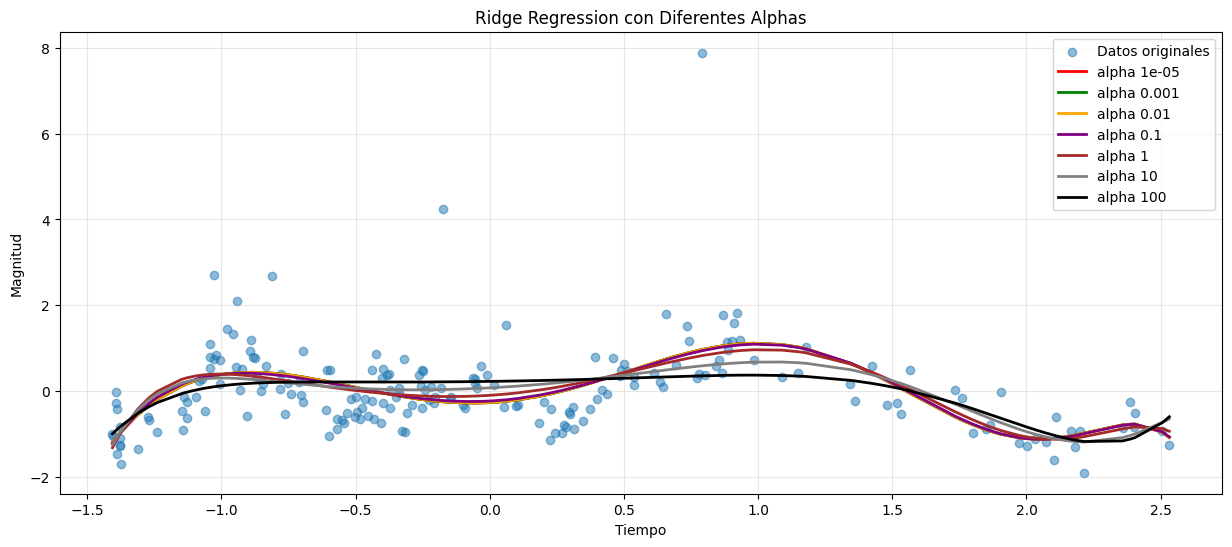

In [ ]:
# Datos originales
plt.figure(figsize=(15, 6))
plt.scatter(x, y, alpha=0.5, label='Datos originales')

# Ordenar para que las líneas se vean bien
orden = np.argsort(x)

colors = ['red', 'green', 'orange', 'purple', 'brown','gray', 'black']

for i, y_pred in enumerate(y_pred_ridge_list):
  plt.plot(x.iloc[orden], y_pred[orden], label=f'alpha {alphas[i]}', linewidth=2, color=colors[i])

plt.xlabel('Tiempo')
plt.ylabel('Magnitud')
plt.title('Ridge Regression con Diferentes Alphas')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 4. Clasificación de estrellas variables

### a. Cargue la base de datos de estrellas variables ts2.csv. La columna class corresponde a la clase de cada estrella variable y el resto de las columnas corresponden sus descriptores.

In [3]:
dataset_four = pd.read_csv('/content/ts2.csv')
dataset_four

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,lpv,0.02700,0.000000,3,0.270000,0.0190,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,lpv,0.21400,0.000000,18,0.346667,0.1260,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,ecl,0.27050,0.000000,1,0.223333,0.2320,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,lpv,0.34250,0.000000,13,0.396667,-0.0170,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,lpv,0.01075,0.097155,1,0.313830,-0.0020,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,lpv,0.04000,0.112777,2,0.340000,0.0040,-0.000014,1.689189,13.335943,0.001613,0.0155,0.420000,0.004724,17.743225
4996,lpv,0.21250,0.000000,50,0.463333,-0.0655,-0.000224,11.590296,14.113617,0.009283,0.1250,0.303333,0.018120,1375.234215
4997,lpv,0.02175,0.030271,4,0.333333,0.0100,-0.000031,0.014262,14.477476,0.000819,0.0090,0.295238,0.002141,1111.578564
4998,lpv,0.02650,0.446972,2,0.313333,0.0030,0.000013,0.140885,13.661500,0.000972,0.0090,0.430000,0.003221,2866.316360


### b. Genere un análisis descriptivo de ella y aplique las técnicas de procesamiento que sean necesarias

In [4]:
dataset_four.describe()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.106905,0.130491,4.545400,0.317532,0.016345,0.000001,2.175457,14.988370,0.003703,0.039180,0.414658,0.010616,302.831851
std,0.147896,0.202838,6.121163,0.060427,0.126287,0.000684,9.423721,1.889971,0.005527,0.062624,0.122715,0.014490,944.665723
min,0.007000,0.000000,1.000000,0.070470,-1.763000,-0.016436,0.006402,11.666225,0.000259,0.002000,0.069444,0.000893,0.005627
25%,0.021000,0.000016,1.000000,0.290000,-0.004000,-0.000015,0.096856,13.608853,0.000743,0.007000,0.336667,0.002375,0.987460
50%,0.043500,0.020842,2.000000,0.318182,0.002500,-0.000002,0.342336,14.514339,0.001596,0.014000,0.411089,0.004850,18.144685
75%,0.143500,0.185764,5.000000,0.348214,0.017000,0.000009,1.038683,15.592764,0.005258,0.051500,0.480000,0.014186,189.760635
max,1.700500,0.980413,70.000000,0.536667,1.479000,0.033689,335.151515,21.099524,0.075959,1.025000,0.922034,0.171519,12870.875640


In [5]:
dataset_four.dtypes

,0
Class,object
Amplitude,float64
AndersonDarling,float64
Autocor_length,int64
Beyond1Std,float64
Gskew,float64
LinearTrend,float64
MaxSlope,float64
Mean,float64
Meanvariance,float64


Todos los datos son numeric excepto la clase a predecir asi que no se necesita transformar los datos categoricos ya que no hay presencia de ellos

In [6]:
#Nulos
missing = dataset_four.isnull().sum()
missing_pct = (missing / len(dataset_four)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df)

                  Missing Count  Percentage
Class                         0         0.0
Amplitude                     0         0.0
AndersonDarling               0         0.0
Autocor_length                0         0.0
Beyond1Std                    0         0.0
Gskew                         0         0.0
LinearTrend                   0         0.0
MaxSlope                      0         0.0
Mean                          0         0.0
Meanvariance                  0         0.0
MedianAbsDev                  0         0.0
MedianBRP                     0         0.0
PercentAmplitude              0         0.0
PeriodLS                      0         0.0


No hay nulos por lo cual no hay nada que imputar

In [7]:
#Clases de estrellas
class_counts = dataset_four['Class'].value_counts()
class_pct = dataset_four['Class'].value_counts(normalize=True) * 100
class_summary = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_pct
})
print(class_summary)

        Count  Percentage
Class                    
lpv      3775       75.50
rrlyr     506       10.12
ecl       484        9.68
cep       107        2.14
NonVar     82        1.64
dsct       32        0.64
t2cep      11        0.22
acep        2        0.04
dpv         1        0.02


Hay mas datos del tipo de estrellas lpv y en segundo puesto pero muy alejado la clase rrlyr. Por otro lado las clases que menos figuran en el dataset son dpv y acep.
Este es un dataset desbalanceado y al momento del entrenamiento el modelo puede quedar sesgado hacia la clase mas predominante del dataset.

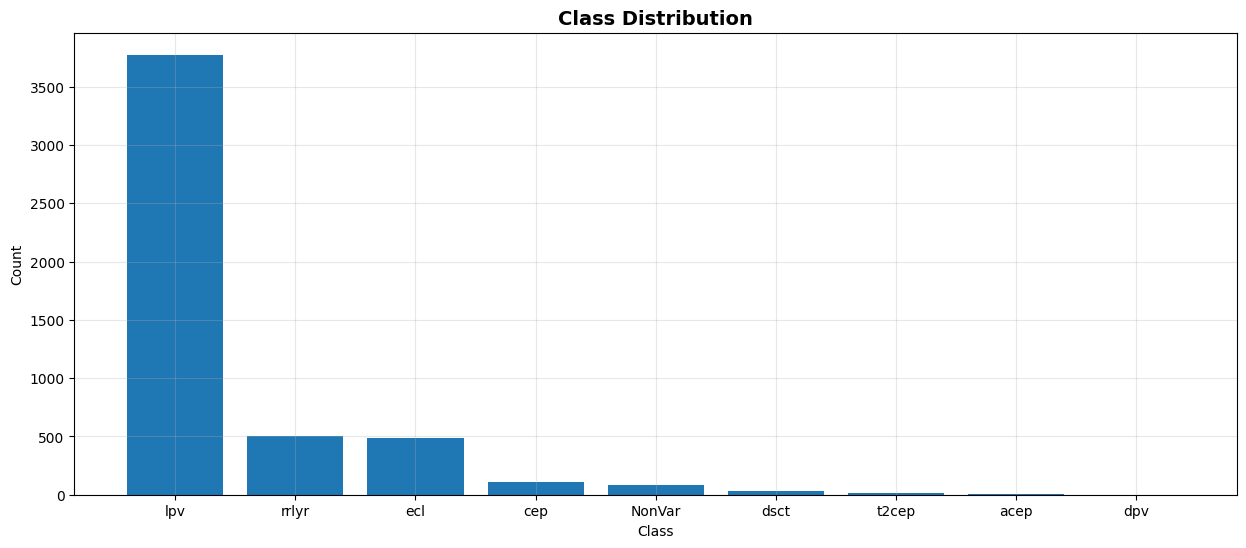

In [8]:
# Bar plot for class distribution
plt.figure(figsize=(15, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

las clases con mayor numero de samples en el dataset son lpv rrlyr ecl

In [9]:
numeric_cols = dataset_four.select_dtypes(include='number').columns
len(numeric_cols)

13

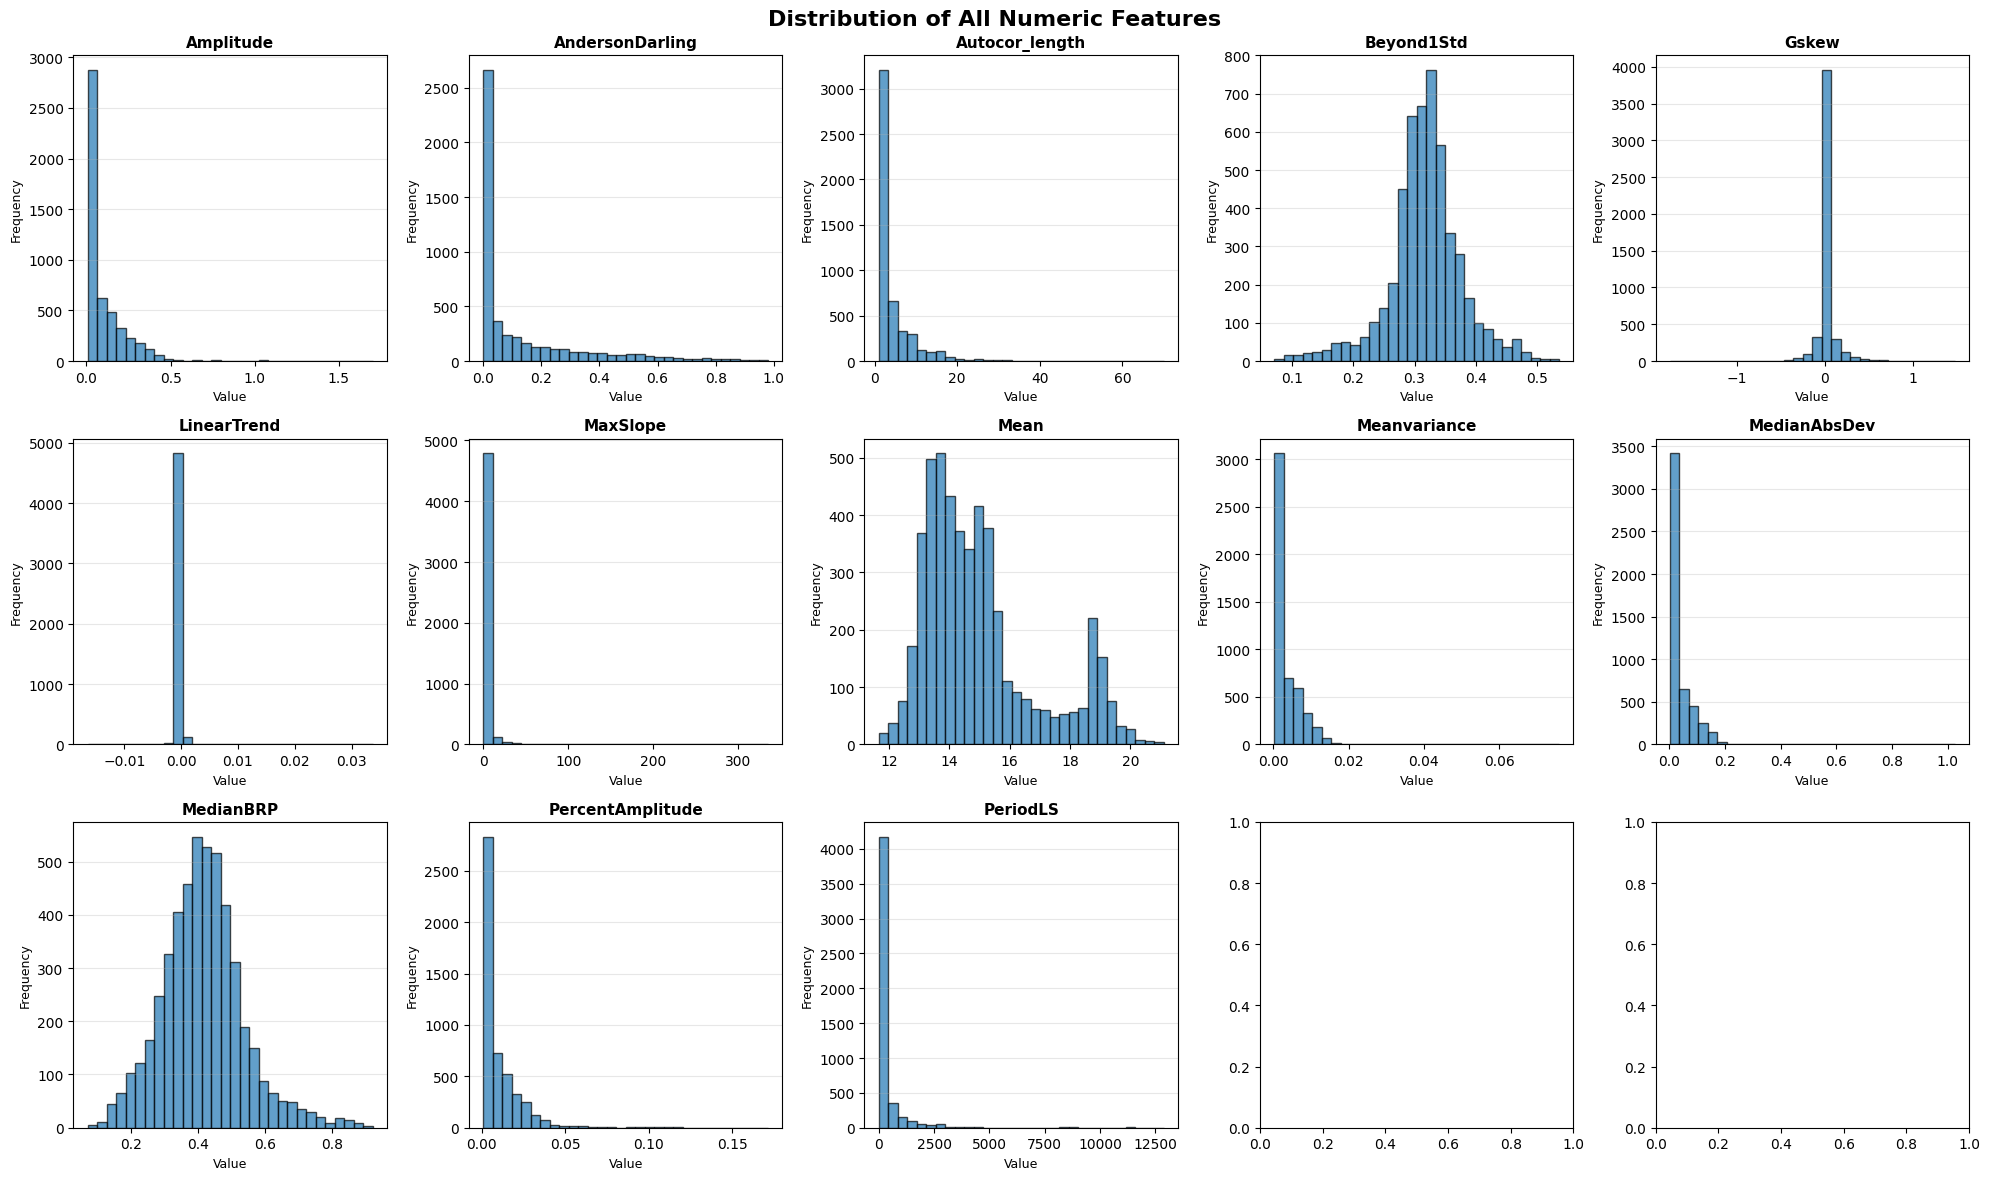

In [10]:
n_cols = 5
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(dataset_four[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Distribution of All Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


Para poder realizar la separacion de train test split se necesita que cada clase tenga no menos de 2 rows por ello vamos a duplicar la fila dpv para que cuente con al menos dos ejemplares. Otra opcion es eliminar la fila ya que el modelo no puede aprender con esa data y si duplicamos la fila igual no sera capaz de reconocer nuevos datos

In [11]:
dpv_row = dataset_four[dataset_four['Class'] == 'dpv']
if len(dpv_row) == 1:
    dataset_four = pd.concat([dataset_four, dpv_row], ignore_index=True)

print(dataset_four['Class'].value_counts())

Class
lpv       3775
rrlyr      506
ecl        484
cep        107
NonVar      82
dsct        32
t2cep       11
dpv          2
acep         2
Name: count, dtype: int64


### c. Separe la base de datos en dos conjuntos, uno para entrenar y otro para testear

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [13]:
X = dataset_four.drop('Class', axis=1)  # All features except Class
y = dataset_four['Class']  # Target variable

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12, stratify=y
)

### d. Aplique 2 clasificadores de los vistos en el curso. Por cada uno de ellos, estudie el efecto que tienen los hiperpará metros sobre la predicció n en el conjunto de entrenamiento y de testeo. Comente el efecto de cada pará metro.

Multinomial es para numeros enteros asi que usaremos Gausian

In [46]:
# GaussianNB
gaund_model = GaussianNB()
gaund_model.fit(x_train, y_train)

y_pred_gaund_model = gaund_model.predict(x_test)

# Metricas
accuracy = accuracy_score(y_test, y_pred_gaund_model)
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\nClassification Report:")
print(f"{classification_report(y_test, y_pred_gaund_model)}" )

Test Accuracy: 0.8634 (86.34%)

Classification Report:
              precision    recall  f1-score   support

      NonVar       0.23      0.92      0.37        25
         cep       0.46      0.75      0.57        32
         dpv       1.00      1.00      1.00         1
        dsct       0.15      0.90      0.26        10
         ecl       0.86      0.52      0.65       145
         lpv       0.99      0.92      0.95      1133
       rrlyr       0.85      0.79      0.82       152
       t2cep       0.11      0.33      0.17         3

    accuracy                           0.86      1501
   macro avg       0.58      0.77      0.60      1501
weighted avg       0.93      0.86      0.89      1501



In [16]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=12)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print(f"Test Accuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

Test Accuracy: 0.9534 (95.34%)

Classification Report:
              precision    recall  f1-score   support

      NonVar       0.52      0.56      0.54        25
        acep       0.00      0.00      0.00         0
         cep       0.80      0.88      0.84        32
         dpv       1.00      1.00      1.00         1
        dsct       0.60      0.60      0.60        10
         ecl       0.87      0.91      0.89       145
         lpv       0.99      0.98      0.99      1133
       rrlyr       0.93      0.89      0.91       152
       t2cep       0.20      0.33      0.25         3

    accuracy                           0.95      1501
   macro avg       0.66      0.68      0.67      1501
weighted avg       0.96      0.95      0.95      1501



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Parece que algunos labels en y_test no aparecen en y_pred. Podria deberse a nuestro dataset desblanceado. En este punto seria mejor retirar las clases que tienen pocos ejemplares y volver a entrenar

In [17]:
# Experiment with var_smoothing
var_smoothing_values = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
nb_results = []

for var_smooth in var_smoothing_values:
    nb_temp = GaussianNB(var_smoothing=var_smooth)
    nb_temp.fit(x_train, y_train)
    train_acc = nb_temp.score(x_train, y_train)
    test_acc = nb_temp.score(x_test, y_test)

    nb_results.append({
        'var_smoothing': var_smooth,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
    })

    print(f"var_smoothing={var_smooth:.0e} | Train: {train_acc:.4f} | Test: {test_acc:.4f}")

var_smoothing=1e-10 | Train: 0.8449 | Test: 0.8561
var_smoothing=1e-09 | Train: 0.8543 | Test: 0.8634
var_smoothing=1e-08 | Train: 0.8400 | Test: 0.8468
var_smoothing=1e-07 | Train: 0.7597 | Test: 0.7628
var_smoothing=1e-06 | Train: 0.6614 | Test: 0.6709
var_smoothing=1e-05 | Train: 0.6029 | Test: 0.6209
var_smoothing=1e-04 | Train: 0.5523 | Test: 0.5763


var smoothing agrega mas valor a la varianza para prevenir que sea 0. Entonces mientras aumentamos ese valor se reduce el train accuracy y el test accuracy

In [48]:
# Experiment with different depths
max_depths = [2, 4, 5, 6, 7, 8, 10]
depth_results = []
dt_list = []
dt_predictions = []

for depth in max_depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=12)
    dt_temp.fit(x_train, y_train)
    pred = dt_temp.predict(x_test)
    train_acc = dt_temp.score(x_train, y_train)
    test_acc = dt_temp.score(x_test, y_test)
    dt_list.append(dt_temp)
    dt_predictions.append(pred)

    depth_results.append({
        'max_depth': str(depth),
        'train_accuracy': train_acc,
        'test_accuracy': test_acc
    })

    print(f"max_depth={str(depth):4s} | Train: {train_acc:.4f} | Test: {test_acc:.4f}")

max_depth=2    | Train: 0.9154 | Test: 0.9067
max_depth=4    | Train: 0.9523 | Test: 0.9434
max_depth=5    | Train: 0.9686 | Test: 0.9480
max_depth=6    | Train: 0.9783 | Test: 0.9514
max_depth=7    | Train: 0.9863 | Test: 0.9594
max_depth=8    | Train: 0.9906 | Test: 0.9594
max_depth=10   | Train: 0.9974 | Test: 0.9587


max_depths es la cantidad de profundidad que puede tener el arbol de decision. Se observa que mientras mas profundidad aumenta el train accuracy y test accuracy

In [20]:
# Criterion
criterions = ['gini', 'entropy']
criterion_results = []

for crit in criterions:
    dt_temp = DecisionTreeClassifier(criterion=crit, random_state=12)
    dt_temp.fit(x_train, y_train)
    train_acc = dt_temp.score(x_train, y_train)
    test_acc = dt_temp.score(x_test, y_test)

    criterion_results.append({
        'criterion': crit,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc
    })

    print(f"criterion={crit:7s} | Train: {train_acc:.4f} | Test: {test_acc:.4f}")


criterion=gini    | Train: 1.0000 | Test: 0.9534
criterion=entropy | Train: 1.0000 | Test: 0.9527


Se observa que aunque se usa diferentes criterios de separacion se obtiene resultados muy similares.

### e. Estudie el clasificador KNN y use su implementació n disponible en Scikit- Learn. Determine el número k (n_neighbors) adecuado para este conjunto de datos

In [24]:
clf = KNeighborsClassifier(n_neighbors = 1)
#entrenamiento
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acc_1 = np.round(accuracy_score(y_test, y_pred), 3)
print(f" Accuracy 1 neighbor {acc_1}")

 Accuracy 1 neighbor 0.928


In [40]:
clf = KNeighborsClassifier(n_neighbors = 2)
#entrenamiento
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acc_1 = np.round(accuracy_score(y_test, y_pred), 3)
print(f" Accuracy 2 neighbor {acc_1}")

 Accuracy 2 neighbor 0.925


In [47]:
clf_3 = KNeighborsClassifier(n_neighbors = 3)
#entrenamiento
clf_3.fit(x_train, y_train)

y_pred_clf_3 = clf_3.predict(x_test)

acc_1 = np.round(accuracy_score(y_test, y_pred_clf_3), 3)
print(f" Accuracy 3 neighbor {acc_1}")

 Accuracy 3 neighbor 0.935


In [38]:
clf = KNeighborsClassifier(n_neighbors = 4)
#entrenamiento
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acc_1 = np.round(accuracy_score(y_test, y_pred), 3)
print(f" Accuracy 4 neighbor {acc_1}")

 Accuracy 4 neighbor 0.934


In [37]:
clf = KNeighborsClassifier(n_neighbors = 5)
#entrenamiento
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acc_1 = np.round(accuracy_score(y_test, y_pred), 3)
print(f" Accuracy 5 neighbor {acc_1}")

 Accuracy 5 neighbor 0.931


In [36]:
clf = KNeighborsClassifier(n_neighbors = 6)
#entrenamiento
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acc_1 = np.round(accuracy_score(y_test, y_pred), 3)
print(f" Accuracy 6 neighbor {acc_1}")

 Accuracy 6 neighbor 0.929


In [35]:
clf = KNeighborsClassifier(n_neighbors = 14)
#entrenamiento
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acc_1 = np.round(accuracy_score(y_test, y_pred), 3)
print(f" Accuracy 14 neighbor {acc_1}")

 Accuracy 14 neighbor 0.922


Se obtiene mayor accuracy cuando se tiene 3 neighbors

### f. Compare el rendimiento de los clasificadores, utilizando matrices de confusión y métricas vistas en el curso

Usare el modelo clf_3 de 3 grupos , gaund_model y dt_list[6] debido a que dieron mejor resultado

In [44]:
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,
                             f1_score, precision_recall_fscore_support)

In [50]:
names = ["knn","naive bayes","decision tree"]
models = [clf_3, gaund_model, dt_list[6]]
results = []
preds = [y_pred_clf_3, y_pred_gaund_model, dt_predictions[6] ]

for i, model in enumerate(models):
    pred = preds[i]

    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)

    # For multi-class, use weighted average
    precision = precision_score(y_test, pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, pred, average='weighted', zero_division=0)

    results.append({
        'Model': names[i] ,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,knn,0.935376,0.933738,0.935376,0.933352
1,naive bayes,0.863424,0.933431,0.863424,0.887110
2,decision tree,0.958694,0.960970,0.958694,0.959658


In [54]:
for m, pred in enumerate(preds):
    print(f"\n{names[m]}:")
    print("-" * 70)
    print(classification_report(y_test, pred, zero_division=0))


knn:
----------------------------------------------------------------------
              precision    recall  f1-score   support

      NonVar       0.65      0.60      0.62        25
        acep       0.00      0.00      0.00         0
         cep       0.65      0.69      0.67        32
         dpv       0.00      0.00      0.00         1
        dsct       0.56      0.50      0.53        10
         ecl       0.90      0.72      0.80       145
         lpv       0.98      0.99      0.98      1133
       rrlyr       0.79      0.88      0.83       152
       t2cep       0.00      0.00      0.00         3

    accuracy                           0.94      1501
   macro avg       0.50      0.49      0.49      1501
weighted avg       0.93      0.94      0.93      1501


naive bayes:
----------------------------------------------------------------------
              precision    recall  f1-score   support

      NonVar       0.23      0.92      0.37        25
         cep       0.46 

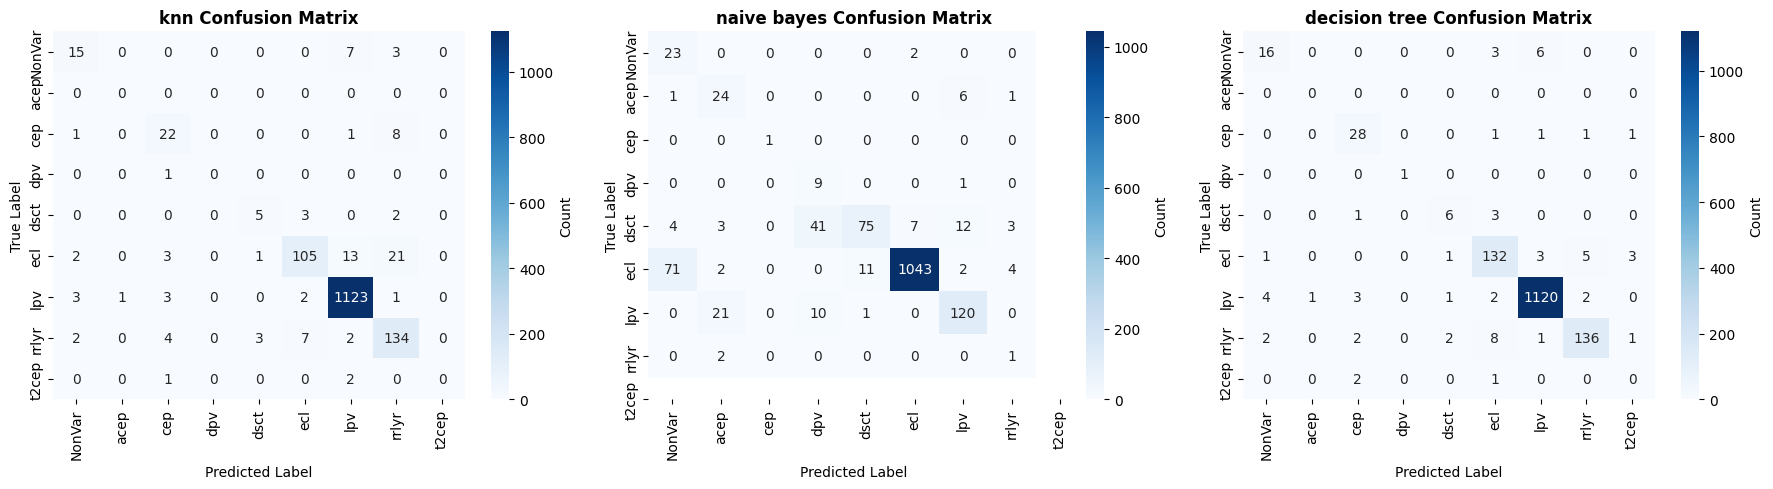

In [53]:
#Matriz de confusion
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, pred in enumerate(preds):

    cm = confusion_matrix(y_test, pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=models[idx].classes_,
                yticklabels=models[idx].classes_,
                ax=axes[idx], cbar_kws={'label': 'Count'})
    axes[idx].set_title(f'{names[idx]} Confusion Matrix', fontweight='bold', fontsize=12)
    axes[idx].set_ylabel('True Label', fontsize=10)
    axes[idx].set_xlabel('Predicted Label', fontsize=10)

plt.tight_layout()
plt.show()

**Como se puede observar las clases predominantes en el dataset (mlpv rrlyr ecl) son las que mejores resultados han obtenido ya que el modelo aprendio a predecirlas mejor, al contrario de las clases que carecian de samples en el dataset (dpv acep t2cep) .
De acuerdo a las metricas el mejor modelo es el Decision Tree con accuracy (96%) , el segundo modelo que mejor performo fue el KNN con una accuracy de 94% y el ultimo es el naive bayes con 86%.
Tambien la matriz de confusion se puede observar que se el modelo NB predijo muy mal hasta las clases predominantes como lpv y ecl, a diferencia que los modelos knn y DT que si predijeron bien esas clases en su mayoria.**